In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

In [2]:
url = "https://drive.google.com/file/d/1pvm4-AR4CewQBn9qTPcH3g_zhIFcKA5e/view?usp=share_link"
path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
url

'https://drive.google.com/file/d/1pvm4-AR4CewQBn9qTPcH3g_zhIFcKA5e/view?usp=share_link'

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


yes in dataset there are missing values. will treat later

In [8]:
#df.duplicated().sum()
df.duplicated().any()

False

In [9]:
# we can drop Loan_ID column
df = df.drop(['Loan_ID'], axis=1)

First create three DataFrame <br>
1 is full Data<br>
2 is for Categorical Data<br>
3 is for Numerical Data

In [10]:
df_numerical = df.select_dtypes(['int64', 'float64'])

In [11]:
df_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [12]:
df_categorical = df.select_dtypes('O')

In [13]:
df_categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


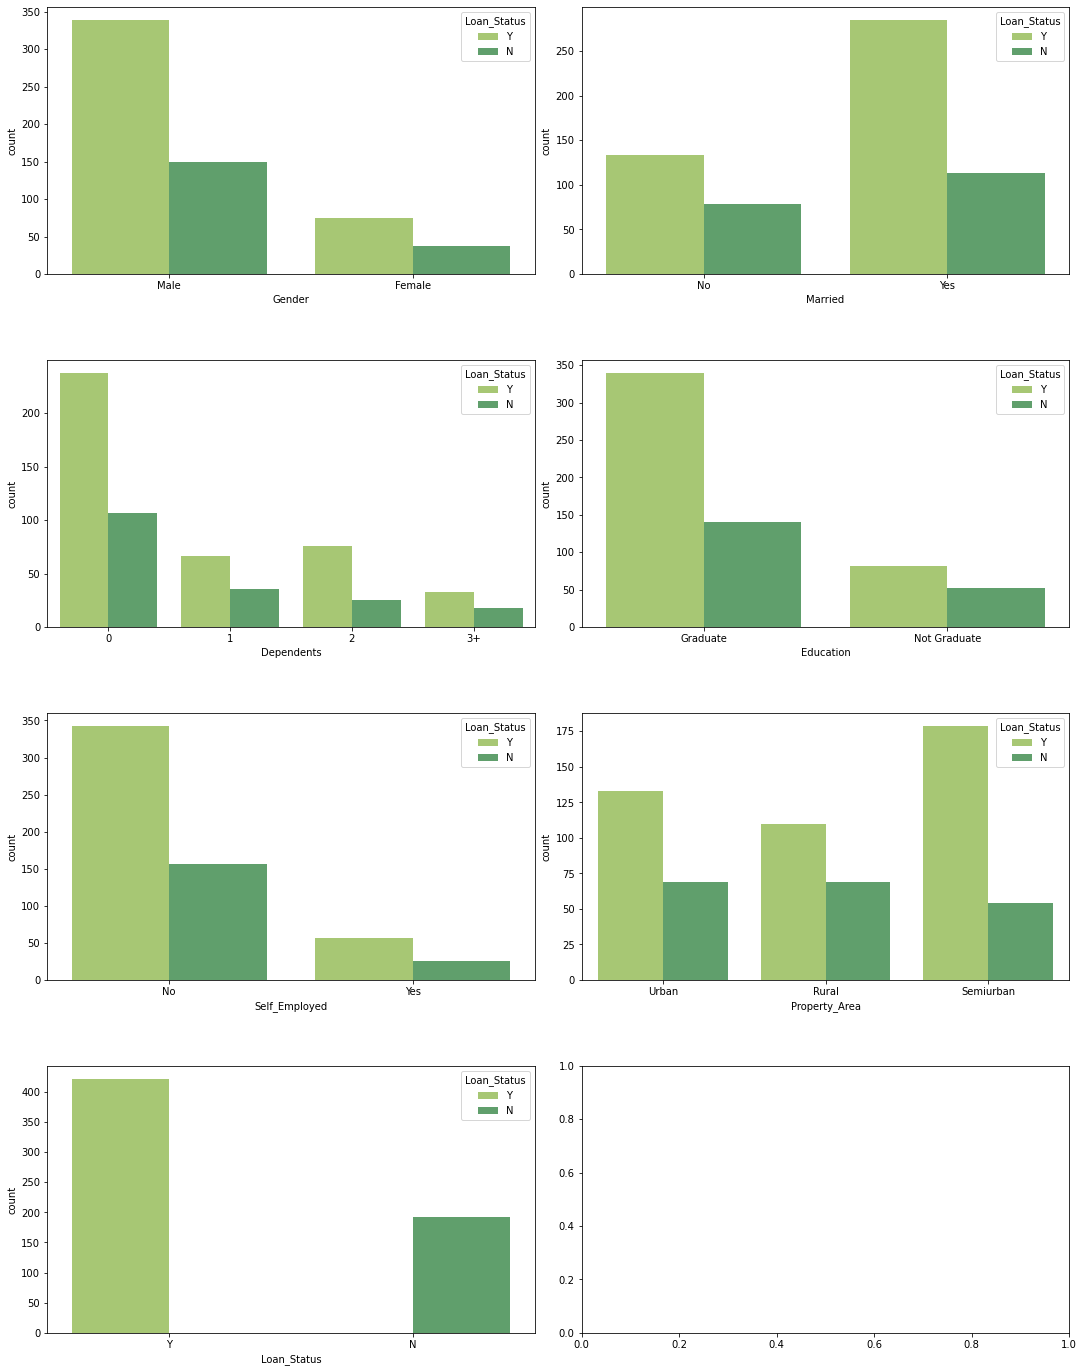

In [14]:
# value counts for each categorical columns
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15,19))
index = 0
ax = ax.flatten()

for col, values in df_categorical.items():
    sns.countplot(x = col, data=df_categorical, hue="Loan_Status", ax = ax[index], palette="summer_r")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

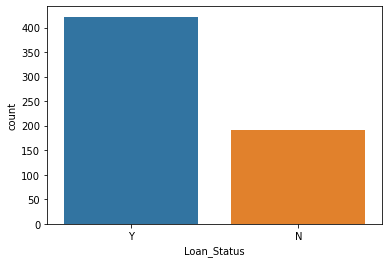

In [15]:
# checking data is ImBalanced?
sns.countplot(x="Loan_Status", data=df)

Yes dataset is ImBalanced we have to treat it

In [16]:
# find All unique values is all categorical columns
df_categorical.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

in dependents column there is value 3+ we need to convert into integer value

In [17]:
np.where(df_categorical.Dependents.isnull())

(array([102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517,
        571, 597], dtype=int64),)

In [18]:
df_categorical.iloc[102]

Gender               Male
Married               Yes
Dependents            NaN
Education        Graduate
Self_Employed          No
Property_Area       Urban
Loan_Status             Y
Name: 102, dtype: object

when Dependents increase what is the chance of loan_approval?

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

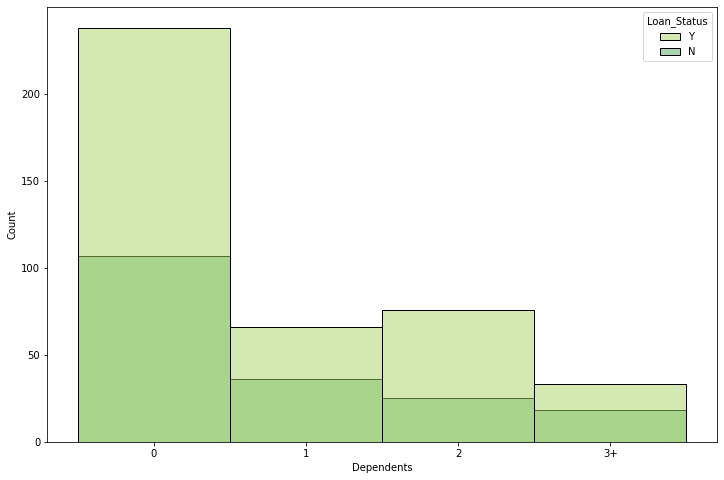

In [19]:
plt.figure(figsize=(12, 8)), 
sns.histplot(x="Dependents", data=df_categorical, hue="Loan_Status", palette="summer_r")

when dependents is 0, 1 or 2 the loan aprroval chance is high. more than 3 dependents loan approval chance is low

what is the chance of loan_approval in Self_Employed person?

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

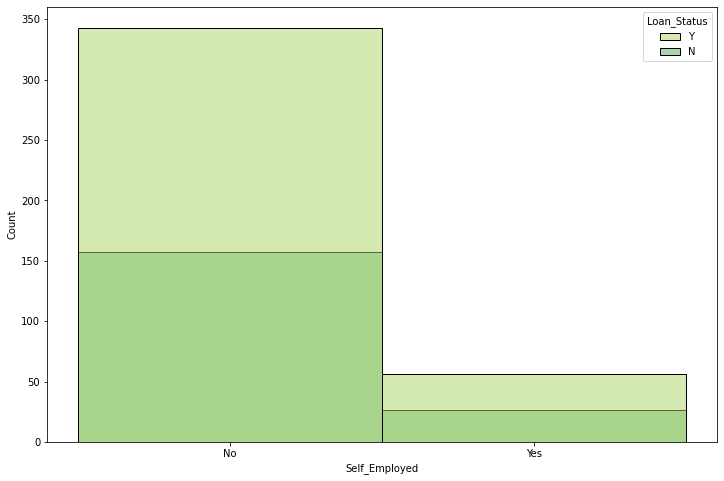

In [20]:
plt.figure(figsize=(12, 8)), 
sns.histplot(x="Self_Employed", data=df_categorical, hue="Loan_Status", palette="summer_r")

person is self_employed or not it does not effect on loan approval

is property area effect on loan approval status?

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

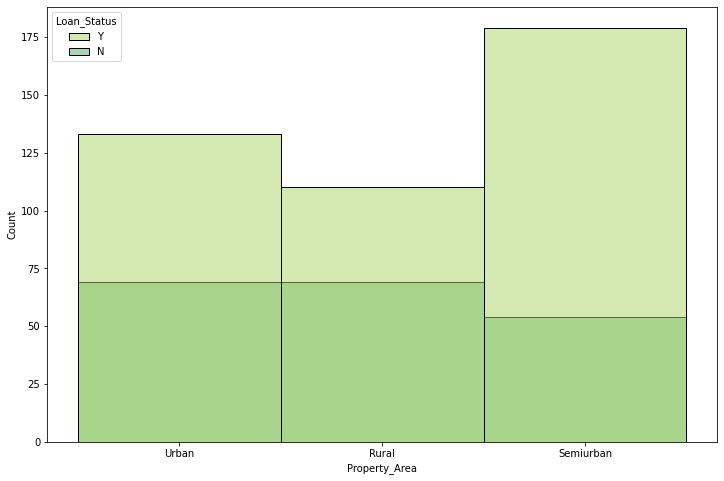

In [21]:
plt.figure(figsize=(12, 8)), 
sns.histplot(x="Property_Area", data=df_categorical, hue="Loan_Status", palette="summer_r")

In SenmiUrban property loan approval rate is high

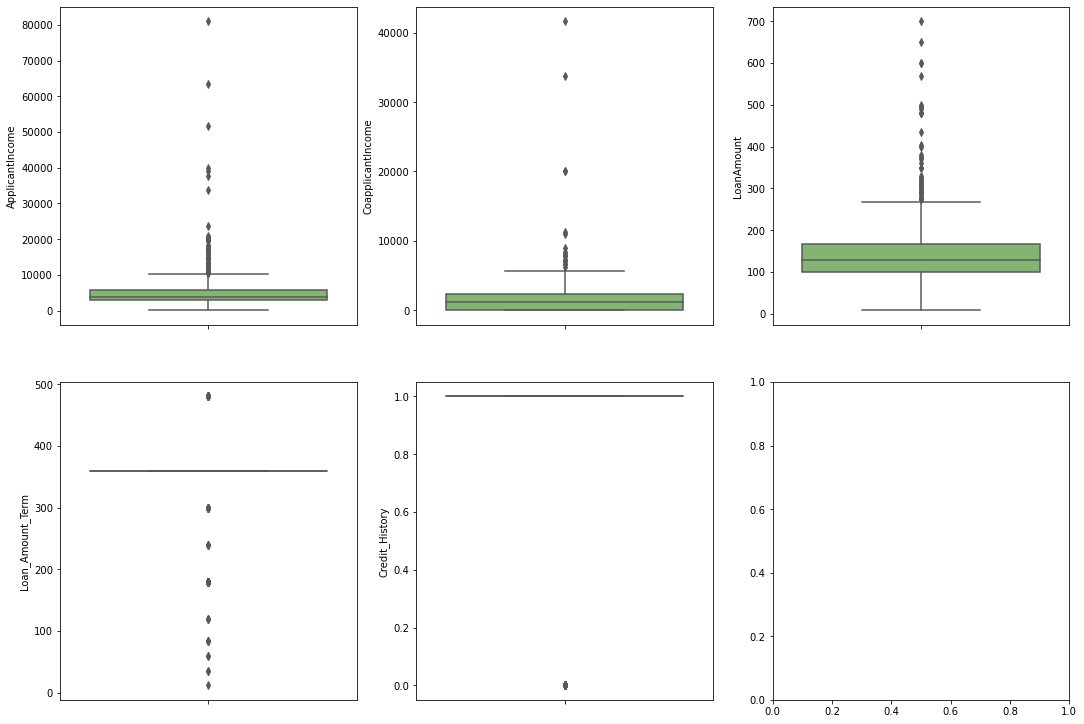

In [22]:
#checking outlier  using boxplot
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()

for col, value in df_numerical.items():
    sns.boxplot(y=col, data=df_numerical, ax=ax[index], palette="summer_r")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Yes there are outliers in columns we will treat it later

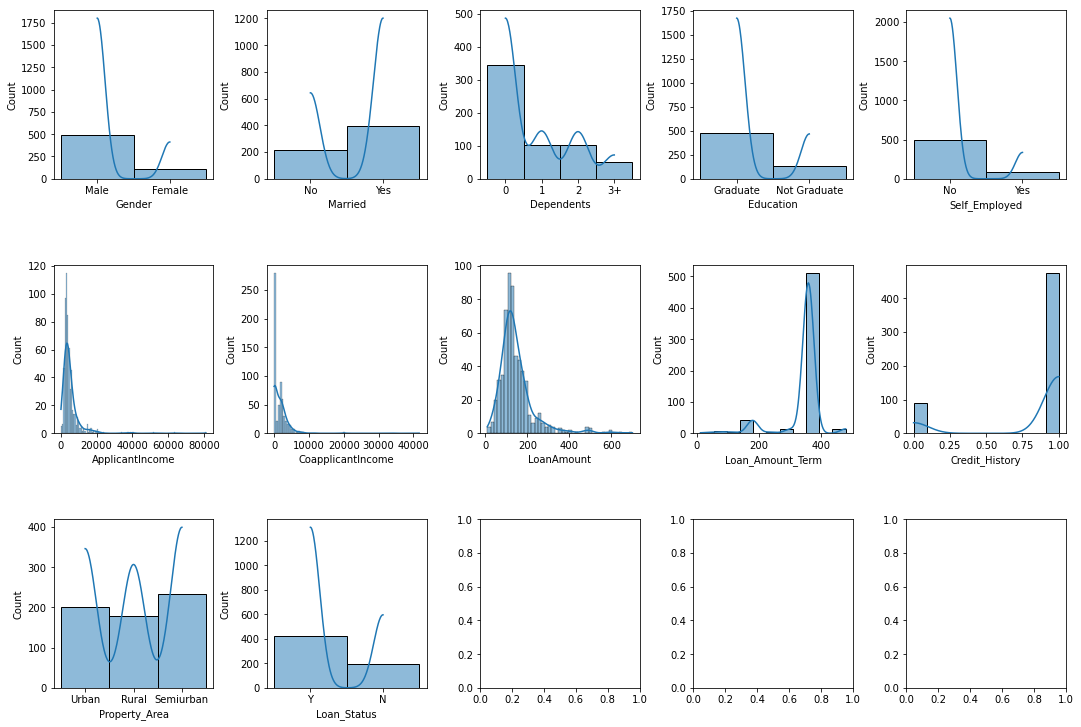

In [23]:
# checking distribution of dataset
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,10), )
index=0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index], kde=True,  palette="summer_r")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

some Numerical columns has right skwed distribution

In [24]:
df_numerical.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0


is ApplicantIncome effect on Loan_approval status

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

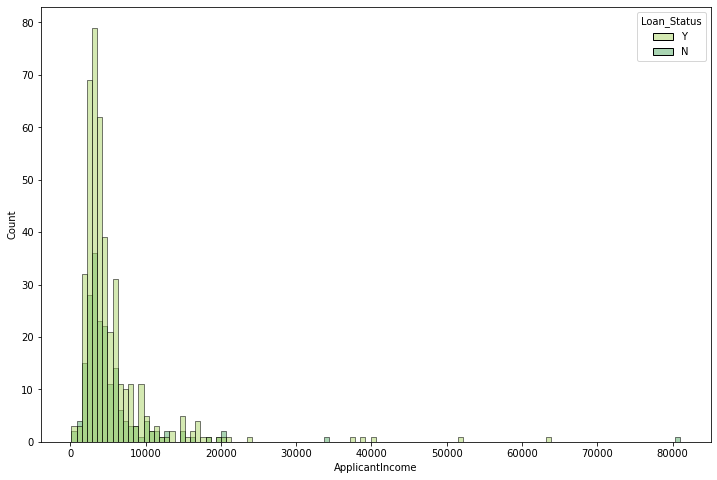

In [25]:
plt.figure(figsize=(12, 8)), 
sns.histplot(x="ApplicantIncome", data=df, hue="Loan_Status", palette="summer_r")

in these graph there is no significant value 

Is Credit_History effect on Loan_Approval status

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

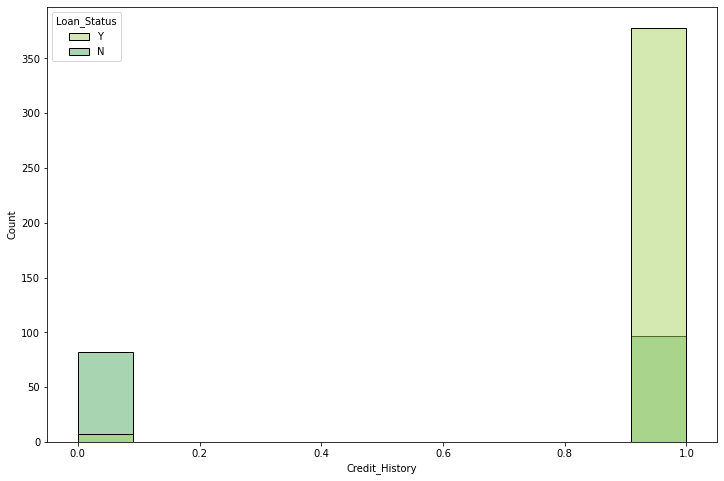

In [26]:
plt.figure(figsize=(12, 8)), 
sns.histplot(x="Credit_History", data=df, hue="Loan_Status", palette="summer_r")

Credit_History: A record of a borrower's responsible repayment of debts (1- has all debts paid, 0- not paid)
For both credit score loan approval chance is high

## Preprocessing

### Handiling Missing Value
<br>
For Categorical filling missing value one of the best method is 'mode'<br>
In Numerical data they are skewd menas there is no normal distribution is there. so for skwed data 'median' filling method is good. <br>



In [27]:
# for both cat and num data we will use 'mode' method
df[df_categorical.columns] = df[df_categorical.columns].fillna(df[df_categorical.columns].mode().iloc[0])

In [28]:
# for remaining Numerical columns
df = df.fillna(df.median())

C:\Users\MihirDholakia\AppData\Local\Temp\ipykernel_2188\3113467829.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [29]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Transfor Categorical data into Numerical

In [30]:
# we will convert loan_Status Y:1 & N:0
df['Loan_Status'] = df["Loan_Status"].replace(['Y', 'N'], [1, 0])
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


<AxesSubplot:>

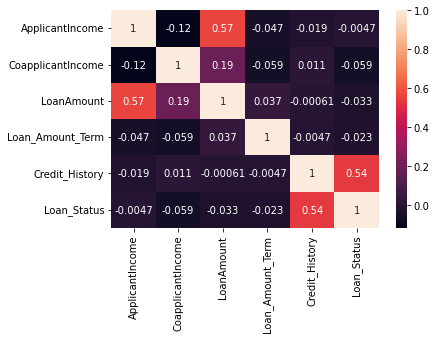

In [31]:
# checking Correlation
#plt.figure(figsize=(15, 20))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [32]:
# we are using OneHotEncoding method
df = pd.get_dummies(df)
df.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


## Imbalanced Data Handling

In [33]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

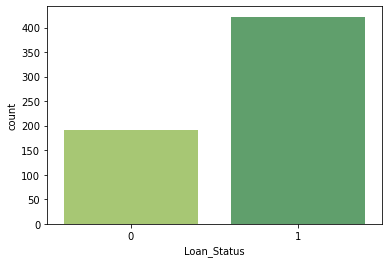

In [34]:
sns.countplot(x="Loan_Status", data=df,  palette="summer_r")

over sapmling used after split data into X and Y. so we will first split our data and combined for scling 

In [35]:
sm = SMOTE(random_state=33)

In [36]:
df_new, df_loan_new = sm.fit_resample(df.drop('Loan_Status', axis=1), df.Loan_Status)

In [37]:
# second method for oversampling and combined X and Y
# we used global keyword for make variable acces global
def over_sample(df, df_loan):
    global df_over_sample
    df_over_sample, df_loan_new = sm.fit_resample(df.drop('Loan_Status', axis=1), df_loan)
    df_over_sample['Loan_Status'] = df_loan_new
    return df_over_sample

In [38]:
over_sample(df, df.Loan_Status)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.000000,360.000000,1.000000,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.000000,1.000000,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.000000,1.000000,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.000000,1.000000,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,6000,0.0,141.000000,360.000000,1.000000,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,7556,0.0,146.429536,360.000000,0.471439,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
840,4013,0.0,124.307716,202.153706,0.876924,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
841,4323,0.0,133.917534,360.000000,0.000000,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
842,6211,0.0,136.081510,360.000000,0.963747,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0


## Scaling Data

In [39]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_over_sample.drop('Loan_Status', axis=1)), columns=df_over_sample.columns[:-1])

In [40]:
df_scaled['Loan_Status'] = df_over_sample['Loan_Status']

In [41]:
df_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.073485,-0.570403,-0.228563,0.289776,0.583328,-0.422813,0.546316,1.550234,-1.145569,0.953678,...,-0.378987,-0.256235,0.645064,-0.483651,0.472428,-0.336833,-0.582823,-0.652438,1.619357,1
1,-0.143815,-0.011533,-0.228563,0.289776,0.583328,-0.422813,0.546316,-0.645064,0.872929,-1.048572,...,-0.378987,-0.256235,0.645064,-0.483651,0.472428,-0.336833,1.715787,-0.652438,-0.617529,0
2,-0.415526,-0.570403,-0.984919,0.289776,0.583328,-0.422813,0.546316,-0.645064,0.872929,0.953678,...,-0.378987,-0.256235,0.645064,-0.483651,-2.116724,2.968830,-0.582823,-0.652438,1.619357,1
3,-0.487101,0.303480,-0.326157,0.289776,0.583328,-0.422813,0.546316,-0.645064,0.872929,0.953678,...,-0.378987,-0.256235,-1.550234,2.067607,0.472428,-0.336833,-0.582823,-0.652438,1.619357,1
4,0.099403,-0.570403,-0.069972,0.289776,0.583328,-0.422813,0.546316,1.550234,-1.145569,0.953678,...,-0.378987,-0.256235,0.645064,-0.483651,0.472428,-0.336833,-0.582823,-0.652438,1.619357,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.366479,-0.570403,-0.003735,0.289776,-0.778608,-0.422813,-1.830441,-0.645064,-1.145569,0.953678,...,-0.378987,-0.256235,-1.550234,-0.483651,-2.116724,-0.336833,-0.582823,-0.652438,-0.617529,0
840,-0.241652,-0.570403,-0.273606,-2.251324,0.266199,-0.422813,0.546316,-0.645064,-1.145569,-1.048572,...,-0.378987,-0.256235,-1.550234,-0.483651,0.472428,-0.336833,-0.582823,-0.652438,-0.617529,0
841,-0.188443,-0.570403,-0.156373,0.289776,-1.993360,-0.422813,-1.830441,-0.645064,-1.145569,-1.048572,...,-0.378987,-0.256235,0.645064,-0.483651,0.472428,-0.336833,-0.582823,1.532712,-0.617529,0
842,0.135620,-0.570403,-0.129974,0.289776,0.489915,-0.422813,0.546316,-0.645064,-1.145569,0.953678,...,-0.378987,-0.256235,-1.550234,2.067607,0.472428,-0.336833,1.715787,-0.652438,-0.617529,0


## spliting Data

In [43]:
x = df_scaled.drop('Loan_Status', axis=1)
y = df_scaled['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

## Base Model

In [49]:
#Function to evaluate the models and output the accuracy score of the model
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.title("confusion Matrix")
    plt.xlabel("Predict Label")
    plt.ylabel("True Label")
    plt.show()
    accuracy = accuracy_score(y_test, y_pred)
    print(f"test accuracy = {accuracy}")
#   print(f"F1 score = {f1_score(y_test, y_pred)}")
    print(f"classification report is =\n {classification_report(y_test, y_pred)}")

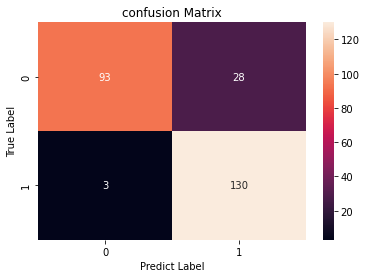

test accuracy = 0.8779527559055118
classification report is =
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       121
           1       0.82      0.98      0.89       133

    accuracy                           0.88       254
   macro avg       0.90      0.87      0.88       254
weighted avg       0.89      0.88      0.88       254



In [50]:
lr_base = LogisticRegression()
lr_base.fit(x_train, y_train)
evaluate(lr_base, x_test, y_test)

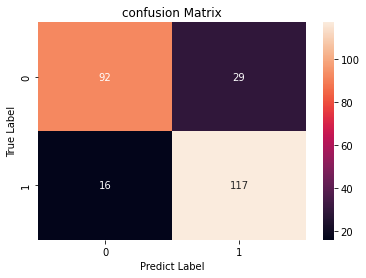

test accuracy = 0.8228346456692913
classification report is =
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       121
           1       0.80      0.88      0.84       133

    accuracy                           0.82       254
   macro avg       0.83      0.82      0.82       254
weighted avg       0.83      0.82      0.82       254



In [51]:
# naive bayes
ab_base = AdaBoostClassifier()
ab_base.fit(x_train, y_train)
evaluate(ab_base, x_test, y_test)

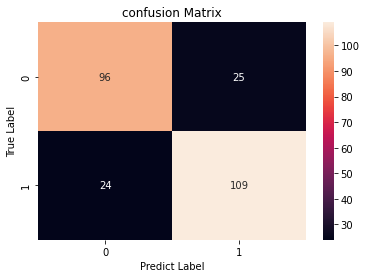

test accuracy = 0.8070866141732284
classification report is =
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       121
           1       0.81      0.82      0.82       133

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [52]:
# RandomForest Classifier
rf_base = RandomForestClassifier()
rf_base.fit(x_train, y_train)
evaluate(rf_base, x_test, y_test)

## Tuning hyperparameters of various models


In [ ]:
ab_tune = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
params = {'base_estimator__max_depth':[4, 6, 8],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[25,50,75]}
              #'learning_rate':[0.01,0.1]}

grid_cv = GridSearchCV(ab_tune, params, verbose=3)
grid_cv.fit(x_train, y_train)

In [ ]:
rf_tune = RandomForestClassifier()
params_rf = {'max_depth': [5, 10, 18],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [100, 200, 300]}
grid_cv_rf = GridSearchCV(rf_tune, params_rf, verbose=3)
grid_cv_rf.fit(x_train, y_train)

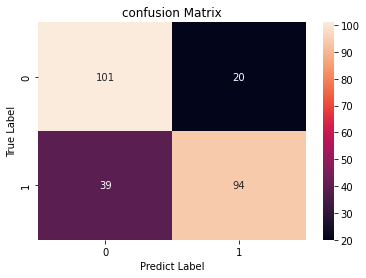

test accuracy = 0.7677165354330708
classification report is =
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       121
           1       0.82      0.71      0.76       133

    accuracy                           0.77       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.78      0.77      0.77       254



In [53]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10),n_estimators=75)
ada_boost.fit(x_train, y_train)
evaluate(ada_boost, x_test, y_test)

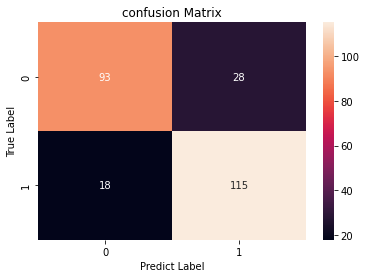

test accuracy = 0.8188976377952756
classification report is =
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       121
           1       0.80      0.86      0.83       133

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



In [54]:
random_forest = RandomForestClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=2, n_estimators=200)
random_forest.fit(x_train, y_train)
evaluate(random_forest, x_test, y_test)